In [21]:
import pandas as pd

In [22]:

df = pd.read_csv('recons-our-bma.csv')


In [23]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCTCCGTTGTATCTA...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGAAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [24]:
from tqdm import tqdm


In [25]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [26]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [27]:
import difflib


In [28]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [29]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 10000/10000 [00:00<00:00, 144992.65it/s]

[23, 148, 148, 178, 202, 234, 262, 290, 309, 315, 321, 371, 388, 402, 408, 444, 491, 505, 508, 568, 570, 610, 613, 647, 665, 694, 731, 710, 745, 776, 787, 813, 840, 851, 862, 882, 903, 915, 951, 998, 994, 1022, 1024, 1087, 1090, 1103, 1098, 1158, 1162, 1220, 1211, 1206, 1221, 1256, 1975, 1964, 1923, 1915, 1915, 1912, 1848, 1839, 1846, 1805, 1847, 1739, 1742, 1712, 1673, 1712, 1674, 1646, 1652, 1631, 1600, 1591, 1552, 1564, 1527, 1519, 1503, 1455, 1441, 1404, 1421, 1405, 1337, 1359, 1320, 1263, 1284, 1295, 1265, 1223, 1246, 1186, 1156, 1133, 1174, 1075, 1083, 1095, 1094, 1047, 1014, 1004, 1006, 1108, 741, 731, 0]


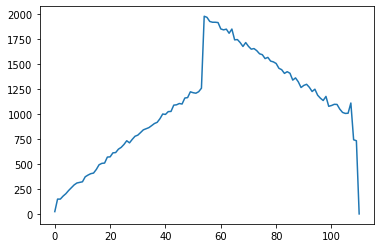

In [30]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [31]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 10000/10000 [00:04<00:00, 2050.92it/s]


In [32]:
import numpy as np


In [33]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [34]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> AAA 6
A -> GC 6
C -> GG 6
G -> AC 6
A -> GT 6
TCA ->  6
C -> TT 7
A -> GG 7
A -> TT 7
G -> TC 8
C -> AA 9
T -> AC 9
T -> CA 10
G -> TT 11
A -> TC 11
T -> GG 12
G -> AA 13
T -> AA 14
CC ->  14
GG ->  14
TT ->  15
AA ->  17
T -> CC 20
GC ->  22
G -> CC 23
AG ->  23
CG ->  25
 -> AG 25
AC ->  25
TG ->  26
 -> AT 26
 -> GA 27
GA ->  28
CT ->  29
 -> GC 30
GT ->  32
 -> CT 32
 -> CG 32
TC ->  32
A -> CC 33
TA ->  33
 -> GT 34
AT ->  35
 -> AA 36
 -> TG 36
 -> TC 37
 -> CA 38
 -> CC 38
 -> AC 39
 -> TA 40
 -> TT 42
 -> GG 43
CA ->  49
G -> T 228
C -> T 235
C -> G 236
G -> A 238
A -> G 244
C -> A 249
A -> T 280
T -> G 288
T -> A 333
G -> C 340
T -> C 421
A -> C 425
 -> T 822
 -> G 889
 -> A 909
 -> C 968
C ->  1017
A ->  1087
G ->  1101
T ->  1217


In [35]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [36]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


C ->  @ 40 6
 -> T @ 66 6
G ->  @ 72 6
A ->  @ 47 6
T ->  @ 12 6
A ->  @ 12 6
 -> T @ 61 6
T -> C @ 58 6
G -> T @ 60 6
T -> C @ 55 6
T -> G @ 104 6
A ->  @ 63 6
 -> C @ 78 6
G ->  @ 84 6
 -> AT @ 55 6
A -> G @ 109 6
G ->  @ 37 6
C ->  @ 33 6
 -> CG @ 55 6
T ->  @ 99 6
T -> A @ 67 6
C ->  @ 106 6
T ->  @ 105 6
T -> G @ 102 6
G -> T @ 13 6
 -> A @ 22 6
T -> C @ 95 6
 -> A @ 100 6
G ->  @ 62 6
 -> TC @ 53 6
A ->  @ 20 6
A -> C @ 25 6
C ->  @ 20 6
 -> TA @ 55 6
C -> T @ 41 6
T -> C @ 87 6
C ->  @ 78 6
A ->  @ 27 6
G -> T @ 22 6
A ->  @ 29 6
G ->  @ 67 6
 -> T @ 28 6
G ->  @ 5 6
A ->  @ 15 6
G -> C @ 54 6
A ->  @ 33 6
A -> T @ 86 6
GT ->  @ 56 6
G ->  @ 50 6
G ->  @ 89 6
T -> A @ 54 6
G -> T @ 54 6
C ->  @ 27 6
T -> C @ 68 6
A -> C @ 2 6
 -> C @ 74 6
C ->  @ 71 6
G ->  @ 26 6
 -> A @ 38 6
A -> C @ 53 6
T ->  @ 81 6
G ->  @ 13 6
G ->  @ 12 6
C ->  @ 63 6
 -> GA @ 53 6
G ->  @ 15 6
G ->  @ 11 6
G -> T @ 91 6
C ->  @ 58 6
A ->  @ 93 6
 -> C @ 46 6
 -> C @ 45 6
A ->  @ 66 6
A -> C @ 70 6
A ->  

In [37]:
import matplotlib.pyplot as plt

In [38]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[48, 72, 118, 72, 64, 69, 68, 55, 59, 60, 57, 62, 67, 65, 67, 63, 62, 65, 68, 53, 67, 61, 71, 58, 61, 76, 66, 76, 72, 45, 78, 64, 66, 65, 68, 68, 82, 69, 72, 67, 77, 72, 83, 67, 86, 74, 78, 83, 74, 64, 81, 100, 254, 639, 1639, 838, 348, 141, 102, 78, 79, 72, 74, 80, 76, 103, 72, 84, 81, 87, 67, 68, 68, 68, 78, 82, 75, 71, 65, 84, 61, 67, 61, 75, 72, 88, 74, 72, 72, 77, 49, 68, 80, 68, 55, 72, 84, 62, 66, 65, 70, 73, 82, 72, 91, 98, 109, 125, 253, 535, 1181]


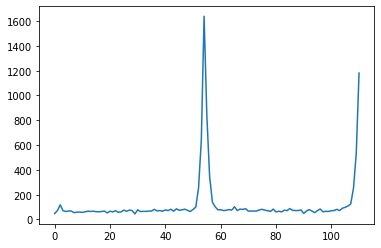

In [39]:
plt.plot(range(strand_len + 1), pos_counts)

In [40]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[5, 3, 1, 3, 2, 1, 1, 2, 1, 2, 1, 2, 1, 4, 4, 2, 1, 1, 2, 1, 2, 3, 1, 0, 1, 1, 1, 3, 6, 3, 2, 0, 2, 2, 2, 2, 2, 2, 3, 1, 0, 3, 2, 2, 4, 1, 1, 3, 3, 3, 4, 8, 26, 89, 254, 62, 23, 7, 3, 2, 2, 6, 3, 1, 4, 2, 6, 1, 4, 2, 4, 4, 1, 4, 5, 1, 5, 3, 2, 2, 4, 4, 1, 3, 0, 0, 3, 1, 1, 2, 1, 1, 3, 2, 0, 2, 4, 4, 0, 1, 1, 4, 3, 5, 0, 7, 4, 4, 10, 67, 39]


In [41]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


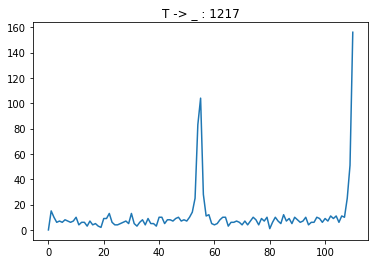

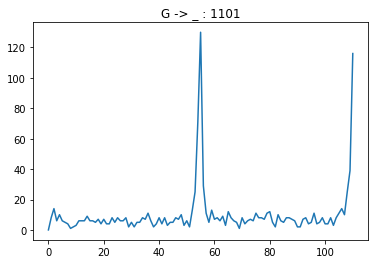

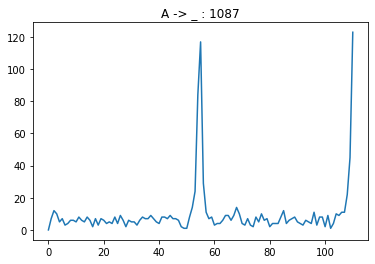

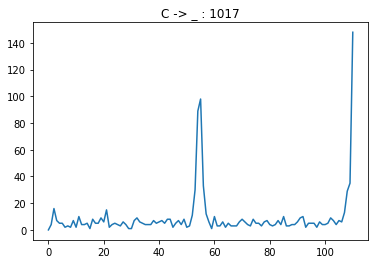

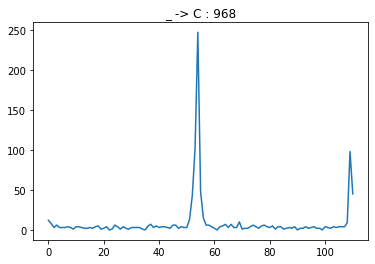

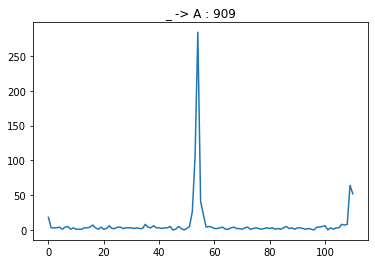

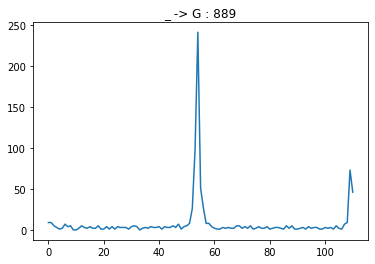

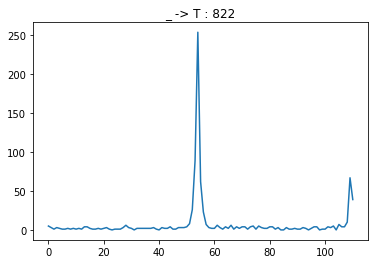

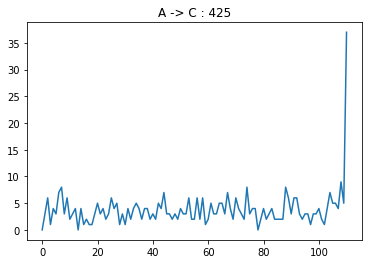

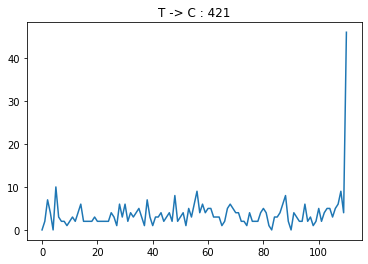

In [42]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [43]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)